In [1]:
import tensorflow
import numpy as np 
import pandas as pd
import re
import wordcloud

In [2]:
full_training_data = pd.read_csv('data/train.csv')
full_training_data = full_training_data.assign(ie=full_training_data['type'].str[0],
                                               sn=full_training_data['type'].str[1],
                                               tf=full_training_data['type'].str[2],
                                               pj=full_training_data['type'].str[3],
                                              )

full_training_data['clean_text'] = full_training_data['posts'].apply(lambda x: re.sub('[^a-z]+', ' ', x.lower()))

full_training_data_words = pd.DataFrame(full_training_data.clean_text.str.split(' ').tolist(), 
                                  full_training_data.instance
                                 ).stack()
full_training_data_words = full_training_data_words.reset_index()[[0, 'instance']]
full_training_data_words.columns = ['word', 'instance']
full_training_data_words = full_training_data_words[full_training_data_words.word != ""]

full_training_data = full_training_data[["instance", "ie", "sn", "tf", "pj"]].set_index('instance').join(
                                            full_training_data_words.set_index('instance')
                                            ).reset_index()


testing_data = pd.read_csv('data/test.csv')
testing_data['clean_text'] = testing_data['posts'].apply(
    lambda x: re.sub('[^a-z]+', ' ', x.lower())
)

testing_data = pd.DataFrame(testing_data.clean_text.str.split(' ').tolist(), 
                            testing_data.instance).stack()
testing_data = testing_data.reset_index()[[0, 'instance']]
testing_data.columns = ['word', 'instance']

EDA


(-0.5, 399.5, 199.5, -0.5)

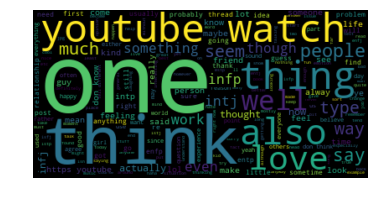

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
cloud = wordcloud.WordCloud().generate(" ".join(full_training_data["word"]))

plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

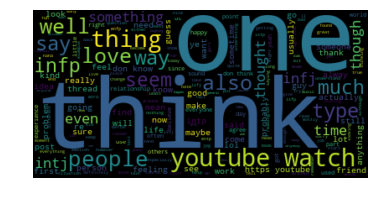

In [4]:
introvert_cloud = wordcloud.WordCloud().generate(
    " ".join(full_training_data.loc[full_training_data.ie == "I"]["word"])
)

plt.imshow(introvert_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

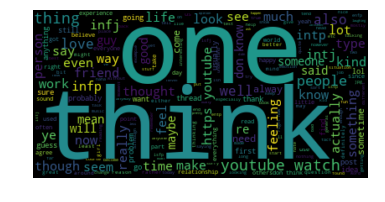

In [5]:
extravert_cloud = wordcloud.WordCloud().generate(
    " ".join(full_training_data.loc[full_training_data.ie == "I"]["word"])
)

plt.imshow(extravert_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

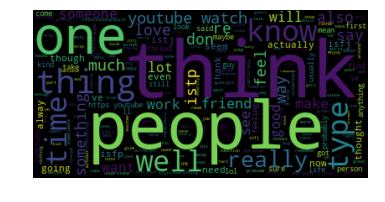

In [6]:
sensing_cloud = wordcloud.WordCloud().generate(
    " ".join(full_training_data.loc[full_training_data.sn == "S"]["word"])
)

plt.imshow(sensing_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

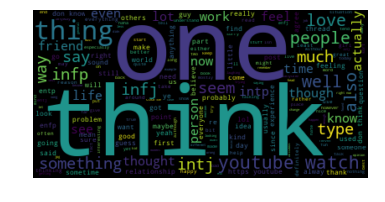

In [7]:
intuitive_cloud = wordcloud.WordCloud().generate(
    " ".join(full_training_data.loc[full_training_data.sn == "N"]["word"])
)

plt.imshow(intuitive_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

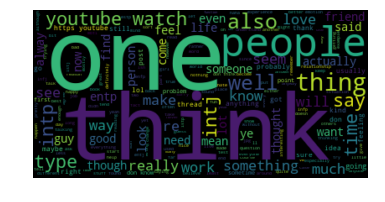

In [8]:
thinking_cloud = wordcloud.WordCloud().generate(
    " ".join(full_training_data.loc[full_training_data.tf == "T"]["word"])
)

plt.imshow(thinking_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

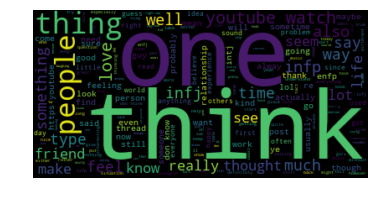

In [9]:
feeling_cloud = wordcloud.WordCloud().generate(
    " ".join(full_training_data.loc[full_training_data.tf == "F"]["word"])
)

plt.imshow(feeling_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

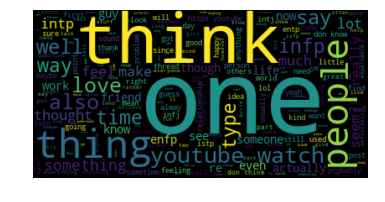

In [10]:
percieving_cloud = wordcloud.WordCloud().generate(
    " ".join(full_training_data.loc[full_training_data.pj == "P"]["word"])
)

plt.imshow(percieving_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

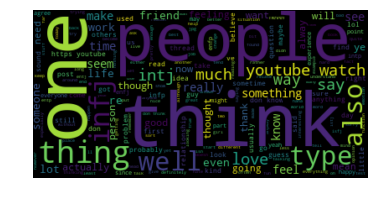

In [11]:
judging_cloud = wordcloud.WordCloud().generate(
    " ".join(full_training_data.loc[full_training_data.pj == "J"]["word"])
)

plt.imshow(judging_cloud, interpolation='bilinear')
plt.axis("off")

How we're going to featurize?

2 Step process
1. [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)
    - way to rank the important words in each document
2. [GloVe](https://nlp.stanford.edu/projects/glove/) word embeddings on the most prominent words

In [32]:
full_training_data["term_frequency"] = 0
full_training_data_tf = full_training_data.groupby(['instance', 'word']).agg("count")

full_training_data_tf

term_frequency
instance word        ie sn pj tf                
0        a           I  N  J  F               17
         about       I  N  J  F                2
         again       I  N  J  F                1
         ages        I  N  J  F                1
         ago         I  N  J  F                1
         ahh         I  N  J  F                1
         all         I  N  J  F                4
         alternative I  N  J  F                1
         always      I  N  J  F                1
         am          I  N  J  F                1
         an          I  N  J  F                3
         and         I  N  J  F               13
         any         I  N  J  F                1
         apis        I  N  J  F                1
         appears     I  N  J  F                1
         aq          I  N  J  F                1
         are         I  N  J  F                2
         area        I  N  J  F                1
         around      I  N  J  F                1
         artist      I  N  J  F                1
         artists     I  N  J  F                2
         as          I  N  J  F                4
         assets      I  N  J  F                1
         at          I  N  J  F                3
         aug         I  N  J  F                1
         avid        I  N  J  F                1
         b           I  N  J  F                4
         baby        I  N  J  F                1
         backyard    I  N  J  F                2
         banned      I  N  J  F                7
...                                          ...
8674     when        I  N  P  F                6
         whenever    I  N  P  F                1
         where       I  N  P  F                1
         while       I  N  P  F                2
         white       I  N  P  F                3
         who         I  N  P  F                6
         wilderness  I  N  P  F                1
         will        I  N  P  F                5
         window      I  N  P  F                2
         wipes       I  N  P  F                1
         with        I  N  P  F               11
         without     I  N  P  F                1
         wolf        I  N  P  F                2
         won         I  N  P  F                3
         work        I  N  P  F                3
         worker      I  N  P  F                1
         world       I  N  P  F                5
         would       I  N  P  F                5
         wouldn      I  N  P  F                1
         wrong       I  N  P  F                2
         www         I  N  P  F                3
         xd          I  N  P  F                1
         yea         I  N  P  F                1
         yes         I  N  P  F                2
         you         I  N  P  F               15
         young       I  N  P  F                1
         your        I  N  P  F                8
         yours       I  N  P  F                1
         yourself    I  N  P  F                2
         youtube     I  N  P  F                3

[3651859 rows x 1 columns]

In [20]:
document_frequency = full_training_data_tf.reset_index()[['instance','word']].set_index("word").groupby("word").agg("count")
document_frequency = document_frequency.loc[document_frequency['instance'] >= 10] # drop terms that exist in less that 5 documents
document_frequency

,instance
word,
a,6939
aa,96
aaaaaaaaa,18
aaaaand,12
aaaah,15
aaaand,17
aaah,19
aaand,13
aah,16


In [21]:
total_count = len(document_frequency)
document_frequency['idf'] = np.log(
                                float(total_count) / document_frequency['instance']
                            )
idf_table = document_frequency.reset_index()[['word', 'idf']]
idf_table.sort_values(by="idf")

,word,idf
0,a,0.956708
7737,i,0.956708
16288,to,0.956852
16058,the,0.956996
618,and,0.957285
11052,of,0.957429
8512,is,0.957573
8548,it,0.958006
17979,you,0.958150
7943,in,0.959161


In [22]:
full_training_tfidf = full_training_data_tf.reset_index().set_index('word').join(idf_table.set_index('word'), how='inner')
full_training_tfidf = full_training_tfidf.reset_index()
full_training_tfidf['tfidf'] = (1+np.log(full_training_tfidf['term_frequency']))*full_training_tfidf['idf']
full_training_tfidf

,word,instance,ie,sn,pj,tf,term_frequency,idf,tfidf
0,a,0,I,N,J,F,17,0.956708,3.667266
1,a,1,E,N,P,T,26,0.956708,4.073755
2,a,3,I,N,J,T,23,0.956708,3.956460
3,a,5,I,N,J,T,37,0.956708,4.411302
4,a,6,I,N,J,F,39,0.956708,4.461667
5,a,7,I,N,J,T,26,0.956708,4.073755
6,a,8,I,N,J,F,27,0.956708,4.109861
7,a,9,I,N,P,T,26,0.956708,4.073755
8,a,10,I,N,J,F,44,0.956708,4.577072
9,a,12,I,N,J,F,29,0.956708,4.178227


In [23]:
full_training_tfidf.groupby(['word', 'instance'])

In [35]:
highest_tfidf = full_training_tfidf[['instance', 'word', 'tfidf']].set_index("word").groupby(['instance'])['tfidf'].nlargest(10).reset_index()

In [ ]:
full_training_data[['instance', 'ie', 'sn', 'pj', 'tf']].set_index('instance').join(highest_tfidf[['instance', 'word', 'tfidf']].set_index('instance'))

In [ ]:
np.random.seed(seed=1) # for consistency with sets
training_data, validation_data = np.split(full_training_data.sample(frac=1), [int(.75*len(data))]) # splitting into training and validation sets